In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [17]:
df=pd.read_csv("C:\\Users\\sneha\\OneDrive\\Documents\\SEM_3_STUFF\\IDS_project\\final_project_stuff\\cleaned_zomato_final.csv")

In [277]:
df.drop(df.columns[0], axis=1)

,name,address,online_order,book_table,ratings,votes,city_specifics,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,meal_type,city
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,"19/1, New Timberyard Layout, Beside Satellite ...",No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


*************************************

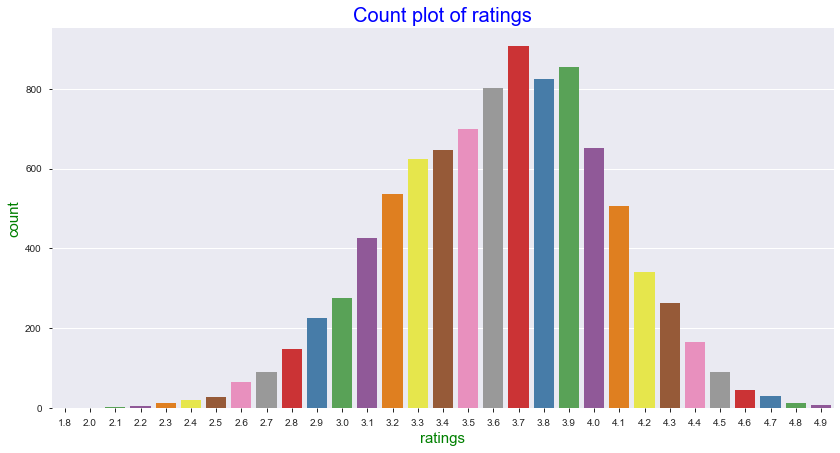

In [252]:
#plot the count of rating.
#plt.rcParams['figure.figsize'] = 14,7
g=sns.countplot(df["ratings"], palette="Set1")
g.set_title("Count plot of ratings",fontsize=20,color="blue")
g.set_ylabel("count",fontsize=15,color="green")
g.set_xlabel("ratings",fontsize=15,color="green")
plt.show()

In [ ]:
###################################################################################################################

In [19]:
import pandas_profiling
df.profile_report()

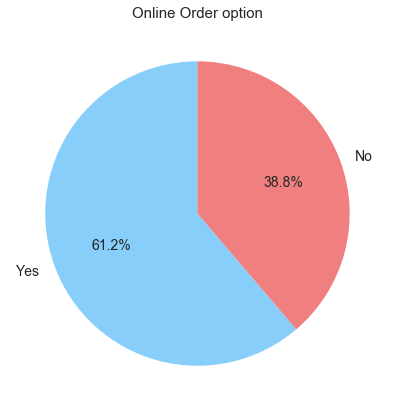

In [60]:
#what % of restaurants have online order option

labels="Yes","No"
sizes=[list(df.online_order).count("Yes"),list(df.online_order).count("No")]
colors=["lightskyblue","lightcoral"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize': 14})
plt.title('Online Order option',fontsize=15)
plt.show()

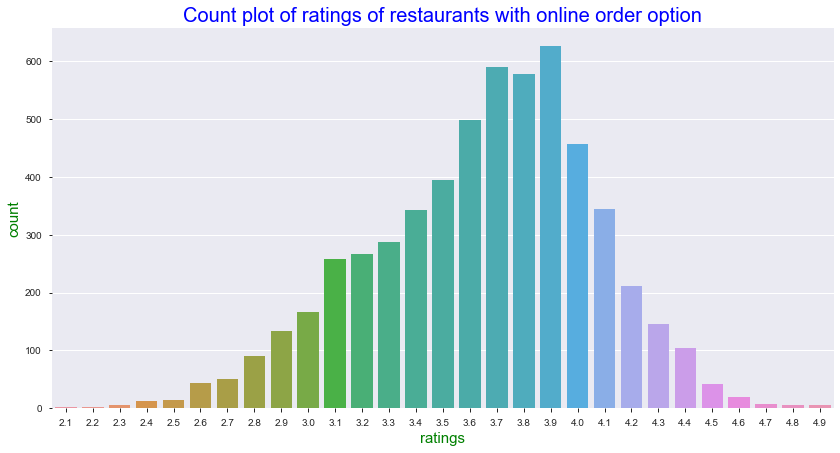

In [242]:
#count vs ratings for rest. with online order option
dfoo=pd.DataFrame(df[df["online_order"]=="Yes"])

g=sns.countplot(x="ratings",data=dfoo)
g.set_title("Count plot of ratings of restaurants with online order option",fontsize=20,color="blue")
g.set_ylabel("count",fontsize=15,color="green")
g.set_xlabel("ratings",fontsize=15,color="green")
plt.show()


In [ ]:
#not much of a shift in mean
#online order doesn't have an impact on ratings

###########################################################################################################################

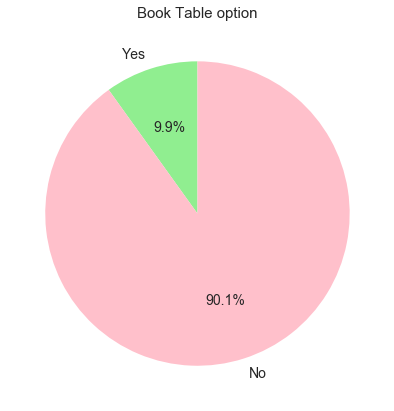

In [102]:
#what % of restaurants have book table option

labels="Yes","No"
sizes=[list(df.book_table).count("Yes"),list(df.book_table).count("No")]
colors=["lightgreen","pink"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize': 14})
plt.title('Book Table option',fontsize=15)
plt.show()

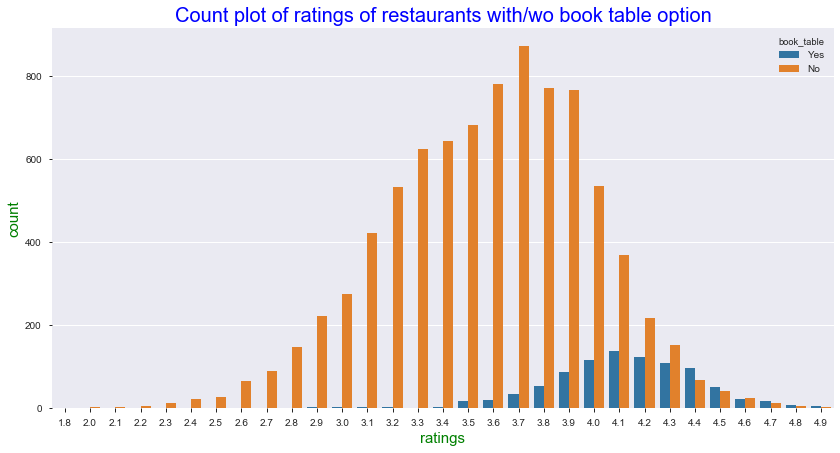

In [251]:
#does book table option being there correspond to higher ratings?
#ideally, it should.

g=sns.countplot(x="ratings",data=df,hue="book_table")
g.set_title("Count plot of ratings of restaurants with/wo book table option",fontsize=20,color="blue")
g.set_ylabel("count",fontsize=15,color="green")
g.set_xlabel("ratings",fontsize=15,color="green")
#g.set(xlim=(2.2,4.9),ylim=(0,140))
plt.show()


In [ ]:
#mean has shifted
#ie, restaurants with book table option tend to have a higher mean rating

#############################################################################################################################

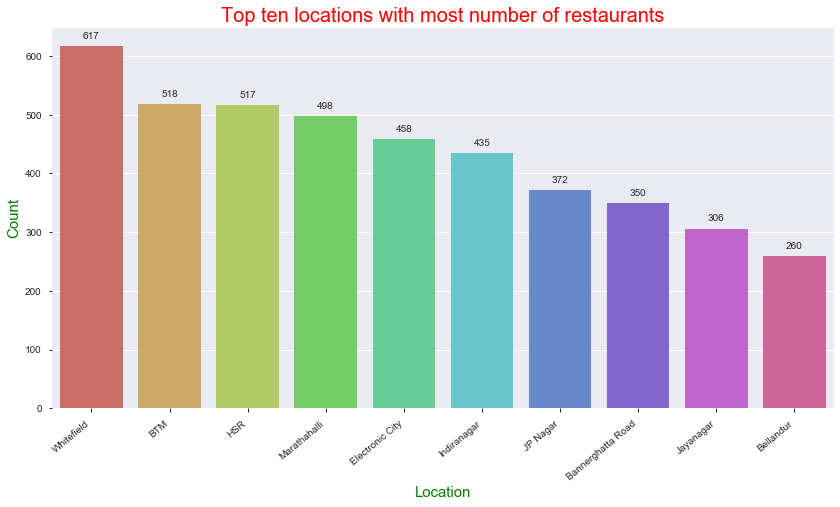

In [110]:
#top 10 locations with the most number of restaurants

g=sns.countplot(x="city_specifics", data=df, palette="hls",
              order=df.city_specifics.value_counts().iloc[:10].index)
g.set_title("Top ten locations with most number of restaurants",fontsize=20,color="red")
g.set_xlabel("Location",fontsize=15,color="green")
g.set_ylabel("Count",fontsize=15,color="green")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [34]:
#Whitefield has the most no of rest. 

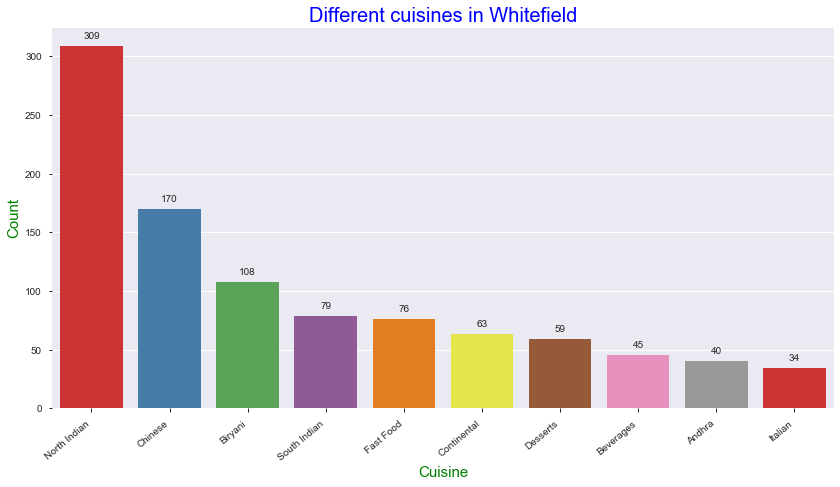

In [296]:
cuisine_list=[]
for i,j in df['cuisines'].iteritems():
    if df["city_specifics"].loc[i]=="Whitefield":
        c_arr=j.split(",")
        for item in c_arr:
            cuisine_list.append(item.lstrip())

data={"cuisines":cuisine_list}
dfcw=pd.DataFrame(data)

g=sns.countplot(x="cuisines",data=dfcw, palette="Set1",order=dfcw.cuisines.value_counts().iloc[:10].index)
g.set_title("Different cuisines in Whitefield",fontsize=20,color="blue")
g.set_xlabel("Cuisine",fontsize=15,color="green")
g.set_ylabel("Count",fontsize=15,color="green")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

############################################################################################################################

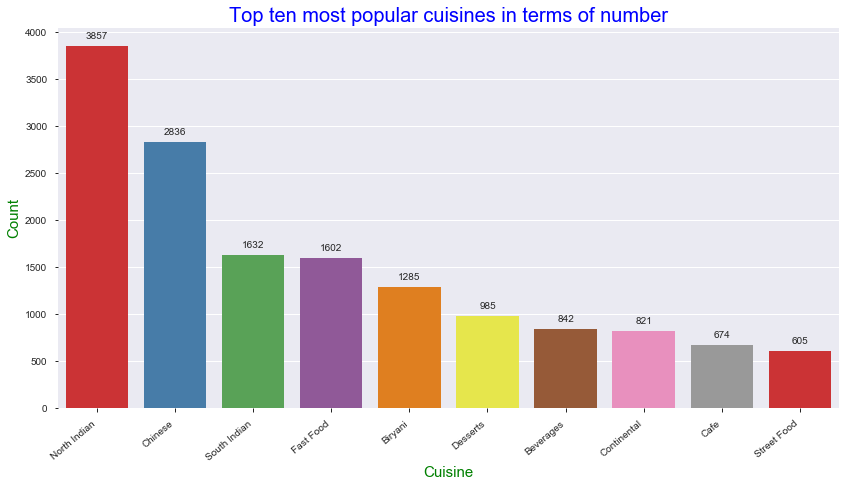

In [192]:
#which cuisine is more popular(in terms of number)?
#top ten cuisines

#one restaurant may have more than one cuisine, have to take care of that
cuisine_list=[]
for i,j in df['cuisines'].iteritems():
        c_arr=j.split(",")
        for item in c_arr:
            cuisine_list.append(item.lstrip())

data={"cuisines":cuisine_list}
dfc=pd.DataFrame(data)

g=sns.countplot(x="cuisines",data=dfc, palette="Set1",order=dfc.cuisines.value_counts().iloc[:10].index)
g.set_title("Top ten most popular cuisines in terms of number",fontsize=20,color="blue")
g.set_xlabel("Cuisine",fontsize=15,color="green")
g.set_ylabel("Count",fontsize=15,color="green")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [32]:
#the most popular cuisine is North Indian

##########################################################################################################################

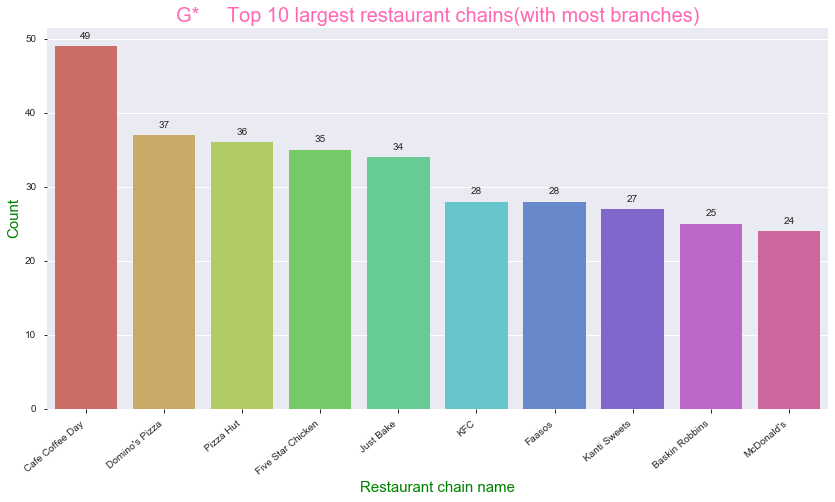

In [164]:
#what are the largest restaurant chains?

g=sns.countplot(x="name",data=df, palette="hls",order=df.name.value_counts().iloc[:10].index)
g.set_xlabel("Restaurant chain name",fontsize=15,color="green")
g.set_ylabel("Count",fontsize=15,color="green")
g.set_title("G*     Top 10 largest restaurant chains(with most branches)",fontsize=20,color="hotpink")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [89]:
#Cafe Coffee Day is the largest chain

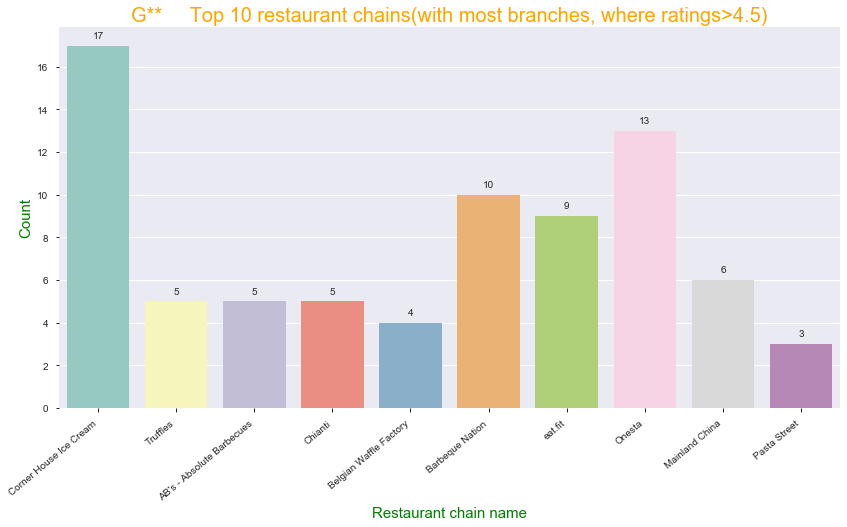

In [165]:
#CCD has the most number of restaurants. Does this also mean it has the highest rating?
#checking to see if no. of branches affects rating in any way

g=sns.countplot(x="name",data=df, palette="Set3",order=df[df["ratings"]>=4.5]["name"].value_counts().iloc[:10].index)
g.set_xlabel("Restaurant chain name",fontsize=15,color="green")
g.set_ylabel("Count",fontsize=15,color="green")
g.set_title("G**     Top 10 restaurant chains(with most branches, where ratings>4.5)",fontsize=20,color="orange")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
#we see that none of the names in G* appear in G**. 
#This means that all the rest. in G** have higher ratings than the ones in G*
#There are restaurants with less no. of branches, but higher rating.
#ex- Pasta Street, which has only 3 branches, has a higher rating than CCD, which has 49 branches

############################################################################################################################

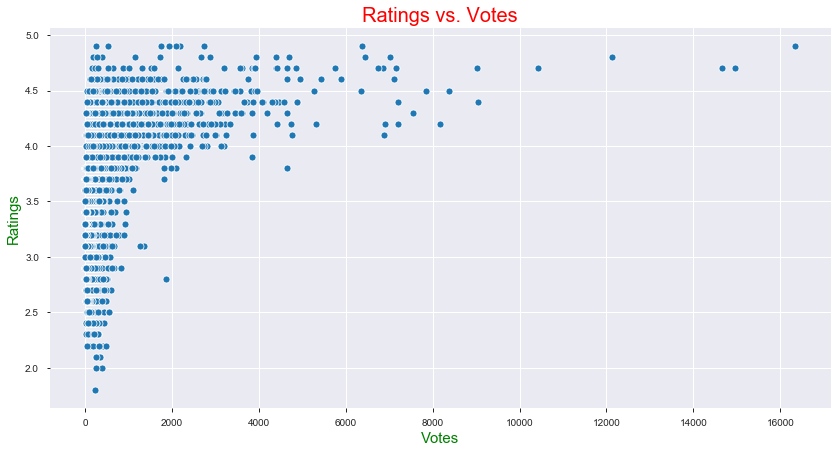

In [176]:
#ratings and votes
x=np.array(df["votes"])
y=np.array(df["ratings"])
g=sns.scatterplot(x,y,data=df)
g.set_xlabel("Votes",color="green",fontsize=15)
g.set_ylabel("Ratings",color="green",fontsize=15)
g.set_title("Ratings vs. Votes",color="red",fontsize=20)
plt.show()

In [ ]:
#low rated restaurants(<3.5) do not have more than 1500 votes
#most restaurants with higher ratings have votes lying bw 0-2500

In [177]:
#what is the one outlier in the top right corner?
#it seems to have a high rating and a great number of votes

In [180]:
df.sort_values(by=['votes'],ascending=False)

,Unnamed_0,name,address,online_order,book_table,ratings,votes,city_specifics,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,meal_type,city
1757,3921,Byg Brewski Brewing Company,"Behind MK Retail, Sarjapur Road, Bangalore",Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
6430,18643,Toit,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",No,No,4.7,14956,Indiranagar,Microbrewery,"Beer, Pesto Pizza, Nachos, Cocktails, Beef Las...","Italian, American, Pizza",1500.0,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Dine-out,Indiranagar
3834,8330,Truffles,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",No,No,4.7,14654,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,"[('Rated 5.0', 'RATED\n Menu is extensive and...",[],Cafes,BTM
8206,40506,AB's - Absolute Barbecues,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",No,Yes,4.8,12121,Marathahalli,Casual Dining,"Raj Kachori, Paan Kulfi, Churros, Butter Chick...","European, Mediterranean, North Indian, BBQ",1600.0,"[('Rated 4.0', 'RATED\n We came here for a te...",[],Buffet,Marathahalli
3798,8268,The Black Pearl,"105, 1st A Cross Road, Jyothi Nivas College Ro...",No,Yes,4.7,10413,Koramangala 5th Block,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean",1400.0,"[('Rated 1.0', ""RATED\n FOOD\nThe buffet was ...",[],Buffet,BTM
4206,9023,Onesta,"562, 8th Main, Koramangala 4th Block, Bangalore",Yes,Yes,4.4,9041,Koramangala 4th Block,"Casual Dining, Cafe","Berryblast, Gourmet Pizza, Mocktails, Ravioli,...","Pizza, Cafe, Italian",600.0,"[('Rated 4.0', 'RATED\n love for unlimited pi...",[],Delivery,BTM
5964,17523,Big Pitcher,"LR Arcade,4121, Old Airport Road, Bangalore",No,Yes,4.7,9021,Old Airport Road,"Pub, Microbrewery","Beer, Cocktails, Tiramisu, Tawa Chicken, Mockt...","American, Continental, North Indian, Mediterra...",1800.0,"[('Rated 4.0', 'RATED\n Been here a couple of...",[],Buffet,Indiranagar
2838,5945,Arbor Brewing Company,"8, 3rd Floor, Allied Grande Plaza, Diagonally ...",No,Yes,4.5,8375,Brigade Road,"Pub, Microbrewery","Kamikaze, Long Island Iced Tea, Pizza, Hefewei...","American, Continental, Salad",2000.0,"[('Rated 5.0', ""RATED\n The beer, the food, t...",[],Dine-out,Brigade Road
5975,17534,Empire Restaurant,"Next to BSNL, HAL 2nd Stage, 80 Feet Road, Ind...",Yes,No,4.2,8176,Indiranagar,Casual Dining,"Dum Biryani, Fiery Chicken, Butter Chicken, Pe...","North Indian, Mughlai, South Indian, Chinese",750.0,"[('Rated 5.0', 'RATED\n Awesome place to have...","['Tandoori Roti', 'Butter Naan', 'Kerala Parot...",Buffet,Indiranagar
7409,28310,Prost Brew Pub,"749, 10th Main, 80 Feet Road, Koramangala 4th ...",No,Yes,4.5,7854,Koramangala 4th Block,"Pub, Microbrewery","Mango Cider, Cajun Potato, Nachos, Salads, Piz...","American, Continental, North Indian, Salad",1800.0,"[('Rated 3.0', ""RATED\n Was here on a Sunday ...",[],Dine-out,Koramangala 4th Block


In [181]:
#the outlier is 'Byg Brewski Brewing Company'
#followed by Toit and Truffles
#what makes these restaurants so popular?

In [ ]:
#if we look at the column 'city_specifics', we can see that the really popular restaurants(votes>10000),
#are located in IT/Business hubs(Bellandur, Indiranagar, Marathahalli, Koramangala)

#we can also see that the restaurant types of these places are perfect for office lunches

##############################################################################################################################

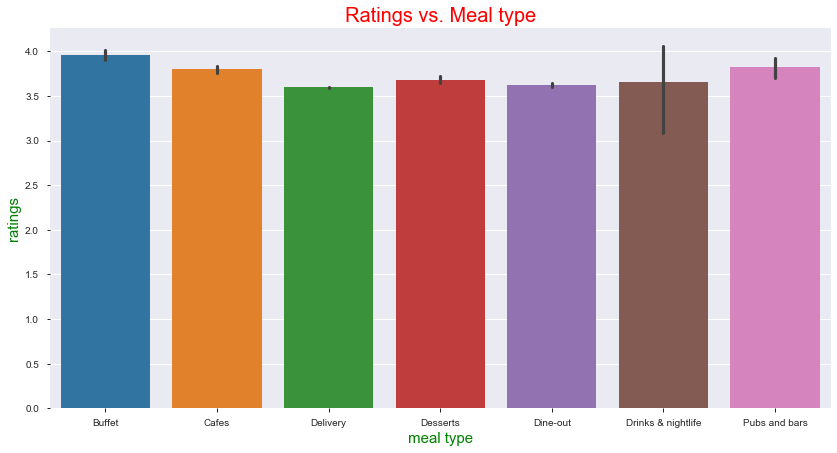

In [189]:
#rating vs meal type

g=sns.barplot(x="meal_type",y="ratings",data=df)
g.set_xlabel("meal type",color="green",fontsize=15)
g.set_ylabel("ratings",color="green",fontsize=15)
g.set_title("Ratings vs. Meal type",color="red",fontsize=20)
plt.show()

In [288]:
#why is 'Drinks & nightlife' varying so much in ratings
for i,j in df["meal_type"].iteritems():
    if j=="Drinks & nightlife":
        print(df["city_specifics"].loc[i])      

Shanti Nagar
MG Road
Old Airport Road
Vijay Nagar
Whitefield


***************************